In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
Sim_res = Path.cwd().parent.parent / 'MagnetCode' / "Simulation Results"
Photos_dir = Path.cwd() / 'Images'
Here = Path.cwd()
from scipy.optimize import minimize

# Сбор статистики

In [7]:
DIR = Sim_res / 'ISAW' / 'TrISAW' / 'energy'
if DIR.exists():
    dataset = list(DIR.glob('BC*.txt'))
else:
    print('not exists!')
    #print(*list(map(lambda x: x.name, dataset)), sep='\n')

In [8]:
def collect(dataset, full_data=None, sort=False):
    for d in dataset:
        data = pd.read_csv(d, sep=' ', index_col=False)
        if full_data is None:
            full_data = data
        else:
            full_data = pd.concat([full_data, data], ignore_index=True)
    if sort:
        full_data.sort_values(by=['J', 'N'], inplace=True, ignore_index=True)
    return full_data

data = collect(dataset, sort=True)

# Проверка

### Геометрия

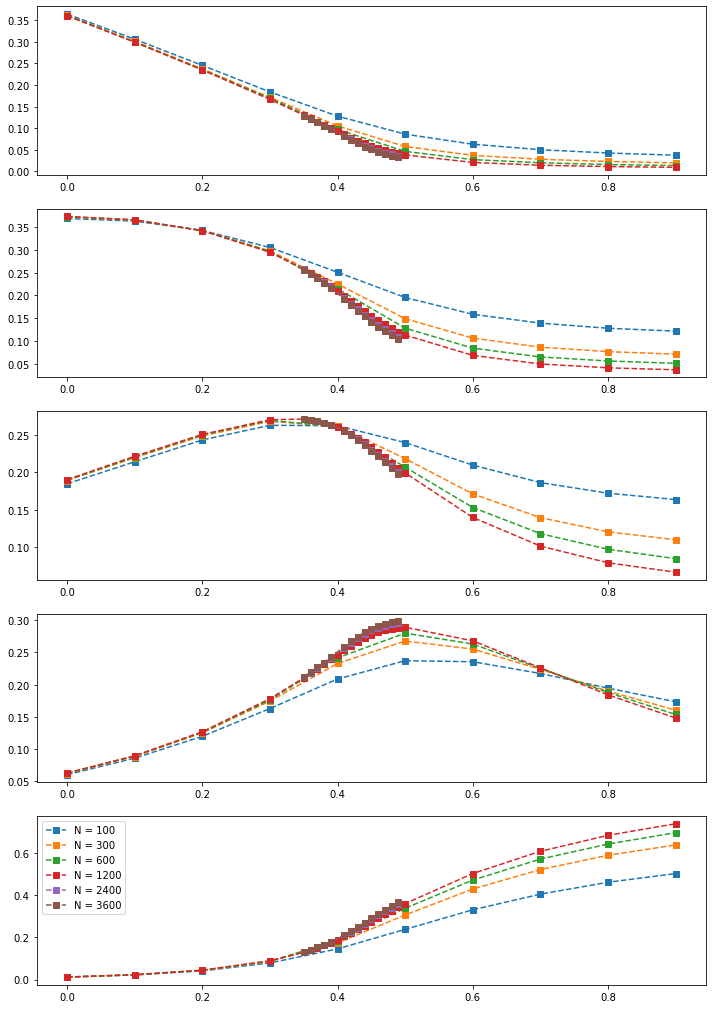

In [6]:
x = 'J'
y_names = ['bulk2','bulk3','bulk4','bulk5','bulk6']

fig, ax = plt.subplots(5,1,figsize=(12,18))
Ns = data_G.N.unique()
for i, y_name in enumerate(y_names):
    for n in Ns:
        dataN = data_G[(data.N == n)]
        ax[i].plot(x, y_name, 's', linestyle='--', data=dataN, label=f'N = {n}')
ax[i].legend();

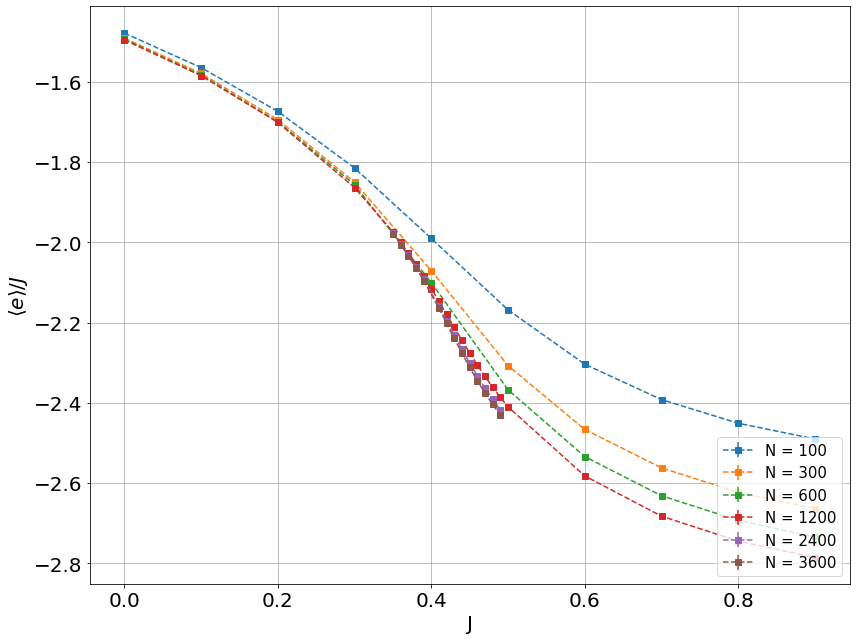

In [9]:
x = 'J'
y_name = 'mean_e'
ye_name = 'err_mean_e'

fig, ax = plt.subplots(figsize=(12,9))
Js = data.J.unique()
Ns = data.N.unique()
for N in Ns:
    dataN = data[data.N == N]
    ax.errorbar(x=x, y=y_name, yerr=ye_name, fmt='s--', data=dataN, label=f'N = {N}')

plt.xlabel('J', fontsize=20)
plt.ylabel(r'$\langle e \rangle / J$', fontsize=20)
plt.legend(loc=4, fontsize=15);
plt.grid();
plt.tick_params(labelsize=20)
plt.tight_layout()
#plt.savefig(Photos_dir / 'TrISAW_R2log.png')

In [10]:
data.rename(columns={'Unnamed: 19': 'steps'}, inplace=True)

In [11]:
data.to_csv(Here / 'CSVs' / 'TrISAW_energy.csv', index=False)

# Графики

In [12]:
data = pd.read_csv(Here / 'CSVs' / 'TrISAW_energy.csv')
data.head(5)

,N,J,h,mean_R_sq,err_mean_R_sq,mean_R_gyr_sq,err_mean_R_gyr_sq,mean_e,err_mean_e,mean_e_sq,err_mean_e_sq,mean_e_fourth,err_mean_e_fourth,mean_m,err_mean_m,mean_m_sq,err_mean_m_sq,mean_m_fourth,err_mean_m_fourth,steps
0,100,0.0,0,933,30,132.057,0.630060,-1.47804,0.000904,2.19230,0.002747,4.87451,0.012851,0,0,0,0,0,0,2000000000
1,300,0.0,0,4940,80,692.231,3.870540,-1.49049,0.000480,2.22417,0.001428,4.97014,0.006363,0,0,0,0,0,0,2000000000
2,600,0.0,0,13782,194,1937.020,21.563200,-1.49332,0.000585,2.23131,0.001754,4.99032,0.007901,0,0,0,0,0,0,2000000000
3,1200,0.0,0,39440,211,5530.430,5.516260,-1.49513,0.000055,2.23608,0.000165,5.00599,0.000736,0,0,0,0,0,0,411000000000
4,100,0.1,0,816,30,117.192,0.670728,-1.56426,0.000802,2.45661,0.002533,6.13147,0.012885,0,0,0,0,0,0,2000000000


In [13]:
data.steps.describe()

count    8.200000e+01
mean     1.475244e+11
std      1.253595e+11
min      1.000000e+09
25%      2.000000e+09
50%      1.710000e+11
75%      2.360000e+11
max      4.110000e+11
Name: steps, dtype: float64

In [14]:
data.columns

Index(['N', 'J', 'h', 'mean_R_sq', 'err_mean_R_sq', 'mean_R_gyr_sq',
       'err_mean_R_gyr_sq', 'mean_e', 'err_mean_e', 'mean_e_sq',
       'err_mean_e_sq', 'mean_e_fourth', 'err_mean_e_fourth', 'mean_m',
       'err_mean_m', 'mean_m_sq', 'err_mean_m_sq', 'mean_m_fourth',
       'err_mean_m_fourth', 'steps'],
      dtype='object')

### $R^2(N)$

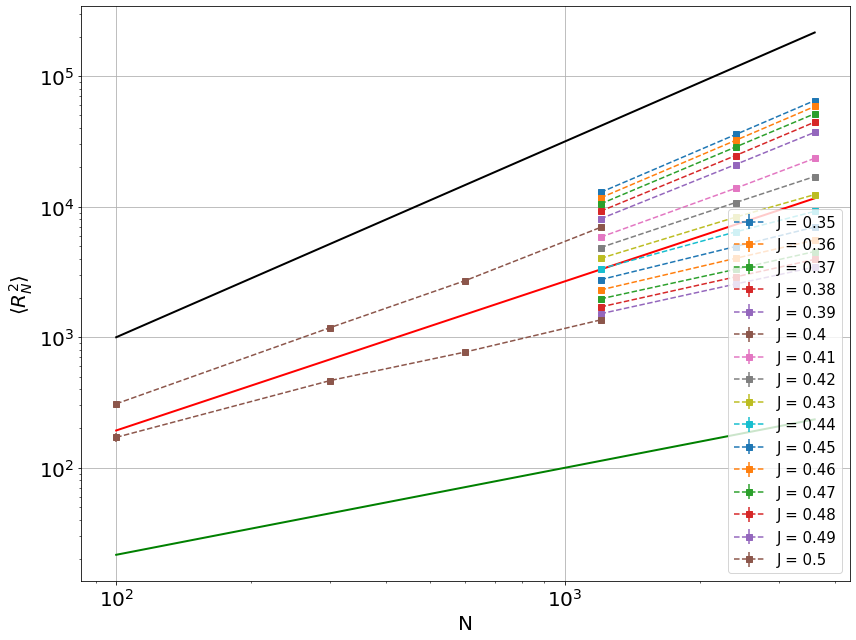

In [15]:
x = 'N'
y_name = 'mean_R_sq'
ye_name = 'err_mean_R_sq'

fig, ax = plt.subplots(figsize=(12,9))
Js = data.J.unique()
Ns = data.N.unique()
Js = Js[(Js > 0.3) & (Js < 0.6)]
for j in Js:
    dataN = data[data.J == j]
    ax.errorbar(x=x, y=y_name, yerr=ye_name, fmt='s--', data=dataN, label=f'J = {j}')

plt.xlabel('N', fontsize=20)
plt.xscale('log')
plt.yscale('log')
plt.plot(Ns, Ns ** (2 * 3/4), 'k-', linewidth=2)
plt.plot(Ns, Ns ** (2 * 4/7), 'r-', linewidth=2)
plt.plot(Ns, Ns ** (2 * 1/3), 'g-', linewidth=2)
plt.ylabel(r'$\langle R^2_N \rangle$', fontsize=20)
plt.legend(loc=4, fontsize=15);
plt.grid();
plt.tick_params(labelsize=20)
plt.tight_layout()
#plt.savefig(Photos_dir / 'TrISAW_R2log.png')

### $R^{2} / N^{2\nu}$

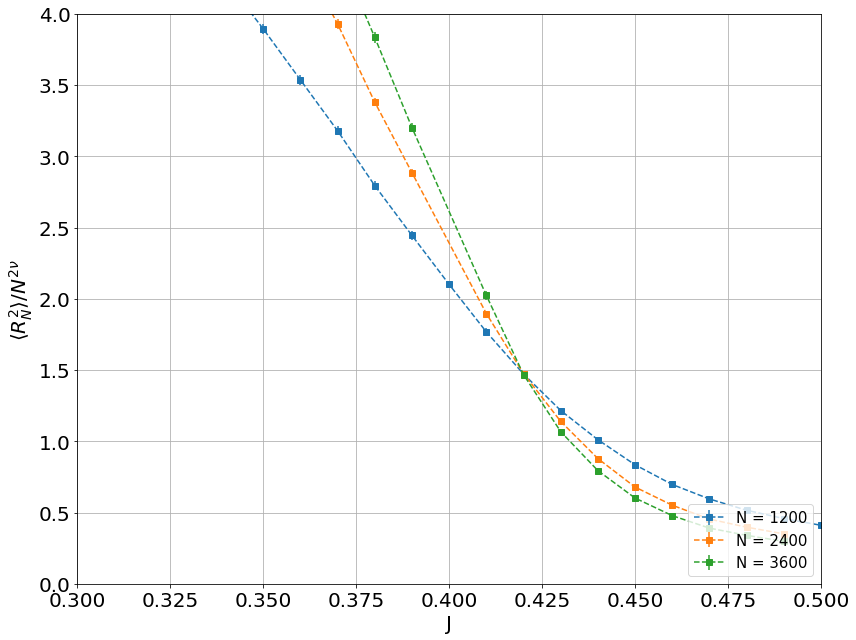

In [16]:
x = 'N'
y_name = 'mean_R_sq'
ye_name = 'err_mean_R_sq'
nu = 4/7

fig, ax = plt.subplots(figsize=(12,9))
Ns = data.N.unique()
for N in Ns[Ns > 1000]:
    dataN = data[data.N == N]
    ax.errorbar(dataN['J'], y=dataN[y_name]/(N ** (2 * nu)), yerr=dataN[ye_name]/(N ** (2 * nu)), fmt='s--', label=f'N = {N}')

plt.xlim(0.3, 0.5)
plt.ylim(0,4)
plt.xlabel('J', fontsize=20)
plt.ylabel(r'$\langle R^2_N \rangle / N^{2\nu}$', fontsize=20)
plt.legend(loc=4, fontsize=15);
plt.grid();
plt.tick_params(labelsize=20)
plt.tight_layout()
#plt.savefig(Photos_dir / 'TrIsISAW_R2log.png')